In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import gsw_calls

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

In [3]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')
iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 388; iX2 = 271

In [4]:
e3t = mesh.variables['e3t_0'][0, :iZ, iY, iX]

In [24]:
salinity2015 = tracers.salinity.sel(time ='2015', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2015 = tracers.temperature.sel(time ='2015', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)

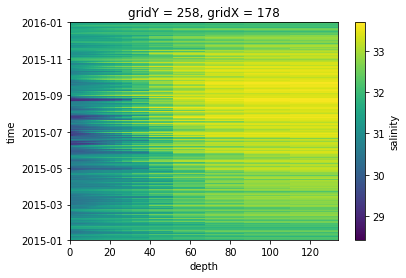

In [25]:
salinity2015.plot()

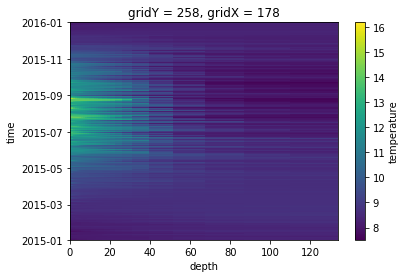

In [26]:
temperature2015.plot()

In [27]:
sigma2015 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2015.values, temperature2015.values])

In [29]:
tlen = sigma2015.shape[0]
south2015 = np.sum(sigma2015[0:tlen] * e3t, axis=1)

In [30]:
# now make pandas arrays of these so I can day bin them etc
den2015 = pd.DataFrame(data=south2015, index=salinity2015.time, columns=['sigma'])
#den2015_2 = pd.DataFrame(data=north2015, index=salinity2015.time, columns=['sigma'])

In [31]:
day_avg_south2015 = den2015.resample('1D').mean()
#day_avg_south2015_2 = den2015_2.resample('1D').mean()

In [32]:
day_avg_south2015.to_csv('day_avg_south2015.csv')
#day_avg_south2015_2.to_csv('day_avg_south2015.csv')

In [38]:
salinity2016 = tracers.salinity.sel(time ='2016', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2016 = tracers.temperature.sel(time ='2016', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)

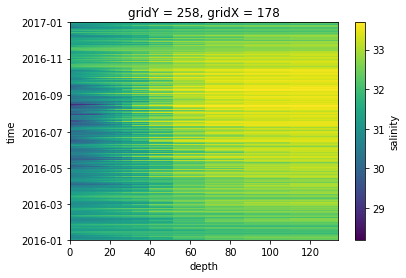

In [55]:
salinity2016.plot()

In [ ]:
temperature2016.plot()

In [54]:
sigma2016 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2016.values, temperature2016.values])

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [21]:
sigma15fq = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [sal15fq.values, temp15fq.values])

In [ ]:
sal15sq = salinity2015[2190:4380]
temp15sq = temperature2015[2190:4380]

In [23]:
sigma15fqpd = pd.DataFrame(data=sigma15fq, index=salinity2015.time, columns=['sigma'])
print (sigma15fqpd)
sigma15fqpd.to_csv('sigma15fq.csv')

ValueError: Shape of passed values is (28, 2190), indices imply (1, 8760)

In [9]:
salinity2017 = tracers.salinity.sel(time ='2017', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2017 = tracers.temperature.sel(time ='2017', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)

In [26]:
print(salinity2016)
print(salinity2017.values)

<xarray.DataArray 'salinity' (time: 8784, depth: 28)>
array([[31.330217, 31.33025 , 31.330343, ..., 32.021797, 32.135101, 32.167278],
       [31.308289, 31.308346, 31.308475, ..., 32.003544, 32.139202, 32.201641],
       [31.322712, 31.322683, 31.32266 , ..., 31.995474, 32.100918, 32.215309],
       ...,
       [31.288994, 31.289539, 31.290384, ..., 31.91868 , 32.005234, 32.164909],
       [31.262768, 31.264208, 31.273119, ..., 31.967224, 32.077908, 32.198048],
       [31.287649, 31.288607, 31.290764, ..., 31.973171, 32.128098, 32.154339]])
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T00:30:00 2016-01-01T01:30:00 ...
  * depth    (depth) float32 0.5000003 1.5000031 2.5000114 3.5000305 ...
    gridY    int16 258
    gridX    int16 178
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        34.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          salinity
    long_name:              salinity
    s

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [24]:
sigma2017 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2017.values, temperature2017.values])

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [ ]:
salinity2015_2 = tracers.salinity.sel(time ='2015', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2015_2 = tracers.temperature.sel(time ='2015', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)

In [ ]:
sigma2015_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2015_2.values, temperature2015_2.values])

In [ ]:
salinity2016_2 = tracers.salinity.sel(time ='2016', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2016_2 = tracers.temperature.sel(time ='2016', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)

In [ ]:
sigma2016_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2016_2.values, temperature2016_2.values])

In [ ]:
salinity2017_2 = tracers.salinity.sel(time ='2017', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2017_2 = tracers.temperature.sel(time ='2017', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)

In [ ]:
sigma2017_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2017_2.values, temperature2017_2.values])

In [ ]:
tlen = sigma2016.shape[0]
south2016 = np.sum(sigma2016[0:tlen] * e3t, axis=1)
north2016 = np.sum(sigma2016_2[0:tlen] * e3t, axis=1)

In [ ]:
tlen = sigma2017.shape[0]
south2017 = np.sum(sigma2017[0:tlen] * e3t, axis=1)
north2017 = np.sum(sigma2017_2[0:tlen] * e3t, axis=1)

In [ ]:
den2016 = pd.DataFrame(data=south2016, index=salinity2016.time, columns=['sigma'])
den2016_2 = pd.DataFrame(data=north2016, index=salinity2016.time, columns=['sigma'])

In [ ]:
den2017 = pd.DataFrame(data=south2017, index=salinity2017.time, columns=['sigma'])
den2017_2 = pd.DataFrame(data=north2017, index=salinity2017.time, columns=['sigma'])

In [ ]:
catsouth = pd.concat([den2015, den2016, den2017])
catnorth = pd.concat([den2015_2, den2016_2, den2017_2])

In [ ]:
day_avg_south = catsouth.resample('1D').mean()
day_avg_north = catnorth.resample('1D').mean()

In [ ]:
msouth = day_avg_south.rolling(window=4, center=True).mean()
mnorth = day_avg_north.rolling(window=4, center=True).mean()

In [ ]:
fig, ax = plt.subplots(1, 1)
day_avg_south.plot(ax=ax)
day_avg_north.plot(ax=ax)
msouth.plot(ax=ax)
mnorth.plot(ax=ax)

In [ ]:
plt.plfig, ax = plt.subplots(1, 1)
(day_avg_south-day_avg_north).plot(ax=ax)
(msouth-mnorth).plot(ax=ax)

In [ ]:
msouth.to_csv('south_sigma_57.csv')
mnorth.to_csv('north_sigma_57.csv')